![header](../figures/logos_partenaires._cmems_se.jpg)


<div class="alert alert-block alert-success">
<h1><center>Compare SSH, gradients and Laplacian pdf in Gulf Stream </center></h1></div>

***
**Authors:**  Datlas, IGE, IMEDEA & CLS <br>
**Copyright:** 2022 Datlas, IGE, IMEDEA & CLS <br>
**License:** MIT

In [1]:
import os
import glob
import sys
sys.path.append('..')
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from src import mod_plot
from src import mod_switchvar
from src.dict_regions_info import *

In [2]:

region_info = RegionInfo('GS_info').region_info   # Region dictionary info from dict_regions_info.py


<div class="alert alert-info" role="alert">

<h2>1. Read from regional data file </h2>

</div>
 

In [5]:
path_data = '../swot_versions/SWOT_v1.0/SWOT_'+region_info['name']+'_v1.0.nc' 

label_noisy_v1 = 'Noisy_v1'   # Name for plots title and saving figures
label_denoised_v1 = 'Denoised_v1'   # Name for plots title and saving figures


name_noisy_v1 = 'ssha' # Name of the denoised SWOT variable in the xarray file 
name_denoised_v1 = 'ssha_noiseless' # Name of the denoised SWOT variable in the xarray file

orbit = '1d'

ds_passes_v1 = xr.open_mfdataset(path_data,combine='nested',concat_dim='num_lines') 

In [6]:
path_data = '../swot_versions/SWOT_v2.0/SWOT_'+region_info['name']+'_v2.0.nc' 

label_noisy_v2 = 'Noisy_v2'   # Name for plots title and saving figures
label_denoised_v2 = 'Denoised_v2'   # Name for plots title and saving figures


name_noisy_v2 = 'ssha_unfiltered' # Name of the denoised SWOT variable in the xarray file 
name_denoised_v2 = 'ssha_filtered' # Name of the denoised SWOT variable in the xarray file

orbit = '1d'

ds_passes_v2 = xr.open_mfdataset(path_data,combine='nested',concat_dim='num_lines') 

<div class="alert alert-info" role="alert">

<h2>2. PDFs computed over all passes (1d orbit) </h2>

</div>

## Compute SSH gradients and Laplacian

In [7]:
grad_noisy_v1, lapl_noisy_v1 = mod_switchvar.deriv1and2(ds_passes_v1[name_noisy_v1])
grad_denoised_v1, lapl_denoised_v1 = mod_switchvar.deriv1and2(ds_passes_v1[name_denoised_v1]) 

In [8]:
grad_noisy_v2, lapl_noisy_v2 = mod_switchvar.deriv1and2(ds_passes_v2[name_noisy_v2])
grad_denoised_v2, lapl_denoised_v2 = mod_switchvar.deriv1and2(ds_passes_v2[name_denoised_v2]) 

## Compute PDFs

In [9]:
# SSH 

ssh_noisy_v1 = np.ravel(ds_passes_v1[name_noisy_v1])
ssh_noisy_v1 = ssh_noisy_v1[~np.isnan(ssh_noisy_v1)]

ssh_denoised_v1 = np.ravel(ds_passes_v1[name_denoised_v1])
ssh_denoised_v1 = ssh_denoised_v1[~np.isnan(ssh_denoised_v1)]

ssh_noisy_v2 = np.ravel(ds_passes_v2[name_noisy_v2])
ssh_noisy_v2 = ssh_noisy_v2[~np.isnan(ssh_noisy_v2)]

ssh_denoised_v2 = np.ravel(ds_passes_v2[name_denoised_v2])
ssh_denoised_v2 = ssh_denoised_v2[~np.isnan(ssh_denoised_v2)]
 
# Gradients

grad_noisy_v1 = np.ravel(grad_noisy_v1)
grad_noisy_v1 = grad_noisy_v1[~np.isnan(grad_noisy_v1)]

grad_denoised_v1 = np.ravel(grad_denoised_v1)
grad_denoised_v1 = grad_denoised_v1[~np.isnan(grad_denoised_v1)]

grad_noisy_v2 = np.ravel(grad_noisy_v2)
grad_noisy_v2 = grad_noisy_v2[~np.isnan(grad_noisy_v2)]

grad_denoised_v2 = np.ravel(grad_denoised_v2)
grad_denoised_v2 = grad_denoised_v2[~np.isnan(grad_denoised_v2)]


# Laplacian

lapl_noisy_v1 = np.ravel(lapl_noisy_v1)
lapl_noisy_v1 = lapl_noisy_v1[~np.isnan(lapl_noisy_v1)]

lapl_denoised_v1 = np.ravel(lapl_denoised_v1)
lapl_denoised_v1 = lapl_denoised_v1[~np.isnan(lapl_denoised_v1)]

lapl_noisy_v2 = np.ravel(lapl_noisy_v2)
lapl_noisy_v2 = lapl_noisy_v2[~np.isnan(lapl_noisy_v2)]

lapl_denoised_v2 = np.ravel(lapl_denoised_v2)
lapl_denoised_v2 = lapl_denoised_v2[~np.isnan(lapl_denoised_v2)]
 


## Plot PDFs' histograms

In [10]:
init_date = str(np.nanmin(ds_passes_v1.time.values).astype('datetime64[D]'))
end_date = str(np.nanmax(ds_passes_v1.time.values).astype('datetime64[D]'))

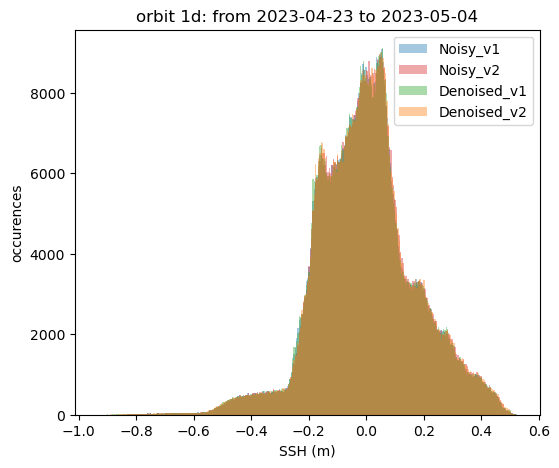

In [18]:
plt.figure(figsize=(6,5))
plt.title('orbit '+orbit+': from '+init_date+' to '+end_date)
plt.hist(ssh_noisy_v1, bins='auto',label=label_noisy_v1, alpha = 0.4, color = 'tab:blue')
plt.hist(ssh_noisy_v2, bins='auto',label=label_noisy_v2, alpha = 0.4, color = 'tab:red')
plt.hist(ssh_denoised_v1, bins='auto',label=label_denoised_v1, alpha = 0.4, color = 'tab:green') 
plt.hist(ssh_denoised_v2, bins='auto',label=label_denoised_v2, alpha = 0.4, color = 'tab:orange')  
plt.xlabel('SSH (m)')
plt.ylabel('occurences')
plt.legend()
plt.savefig('../figures/pdf_compare_v1v2_'+region_info['name']+'_'+orbit+'_ssh.png')
plt.show()

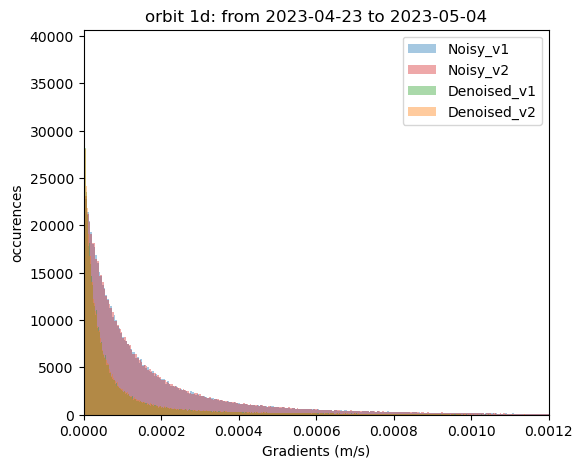

In [ ]:
plt.figure(figsize=(6,5))
plt.title('orbit '+orbit+': from '+init_date+' to '+end_date)

plt.hist(grad_noisy_v1, bins='auto',label=label_noisy_v1, alpha = 0.4, color = 'tab:blue')
plt.hist(grad_noisy_v2, bins='auto',label=label_noisy_v2, alpha = 0.4, color = 'tab:red')
plt.hist(grad_denoised_v1, bins='auto',label=label_denoised_v1, alpha = 0.4, color = 'tab:green')  
plt.hist(grad_denoised_v2, bins='auto',label=label_denoised_v2, alpha = 0.4, color = 'tab:orange') 
plt.xlim(0,0.0012)
plt.xlabel('Gradients (m/s)')
plt.ylabel('occurences')
plt.legend()
plt.savefig('../figures/pdf_compare_v1v2_'+region_info['name']+'_'+orbit+'_grad.png')
plt.show()

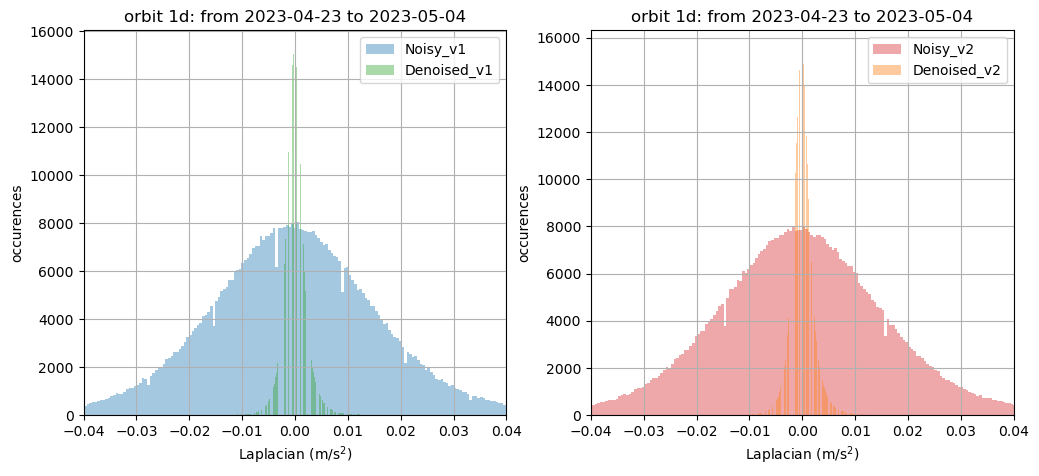

In [24]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('orbit '+orbit+': from '+init_date+' to '+end_date)

plt.hist(lapl_noisy_v1, bins='auto',label=label_noisy_v1, alpha = 0.4, color = 'tab:blue') 
plt.hist(lapl_denoised_v1, bins='auto',label=label_denoised_v1, alpha = 0.4, color = 'tab:green')    
plt.xlim(-0.04,0.04)
plt.xlabel('Laplacian (m/s$^2$)')
plt.ylabel('occurences')
plt.legend()
plt.grid()
plt.subplot(122)
plt.title('orbit '+orbit+': from '+init_date+' to '+end_date)
 
plt.hist(lapl_noisy_v2, bins='auto',label=label_noisy_v2, alpha = 0.4, color = 'tab:red') 
plt.hist(lapl_denoised_v2, bins='auto',label=label_denoised_v2, alpha = 0.4, color = 'tab:orange')  
plt.xlim(-0.04,0.04)
plt.xlabel('Laplacian (m/s$^2$)')
plt.ylabel('occurences')
plt.legend()
plt.grid()
plt.savefig('../figures/pdf_compare_v1v2_'+region_info['name']+'_'+orbit+'_lapl.png')
plt.show()